In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
# read the data
df = pd.read_csv(r"C:\Users\prati\Downloads\archive (11)\healthcare-dataset-stroke-data.csv")

In [58]:
# show the sample data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
# count the values

df.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

# Find the number of null values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

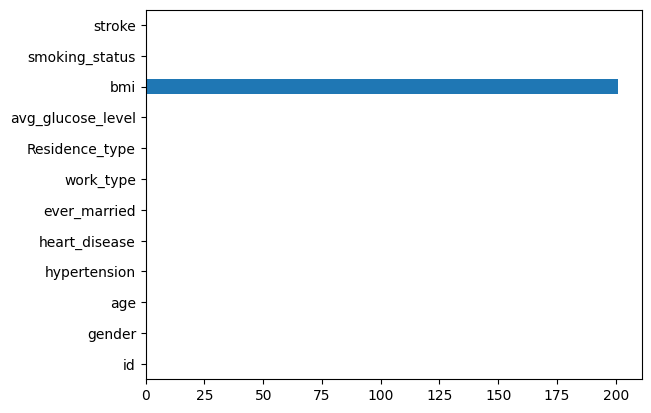

In [60]:
print(df.isna().sum())

# graphical representation of null values
df.isna().sum().plot(kind = "barh")

Found 201 NULL values in bmi column

In [61]:
# statistical analysis

df.describe(include = "all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [62]:
# provide the datatype of all column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Pre-Processign + EDA 

In [63]:
df = df.drop(['id'], axis = 1)

# Gender Analysis

In [64]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

we have a 'other ' gender , we will remove it

gender
Female    2995
Male      2115
Name: count, dtype: int64


<Axes: ylabel='count'>

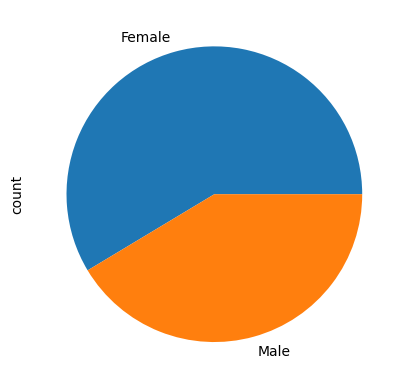

In [65]:
# remove the other gender 
df["gender"] = df["gender"].replace("Other", "Female")

# plot the pie chart

print(df["gender"].value_counts())

df["gender"].value_counts().plot(kind = "pie")

# Target Feature - Stroke
Stroke Analysis

In [66]:
# value count in the stroke attributes

df["stroke"].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

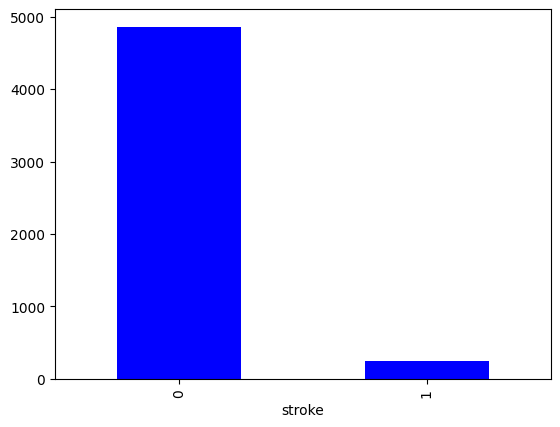

In [67]:
# plot the bar graph

df["stroke"].value_counts().plot(kind = "bar", color = "blue")

In [68]:
print("% of people who actually got stroke ", (df["stroke"].value_counts()[1] / df["stroke"].value_counts().sum()).round(3) * 100)

% of people who actually got stroke  4.9


Only 5% of people got stroke

# Hyper-tension Analysis

In [69]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: xlabel='hypertension'>

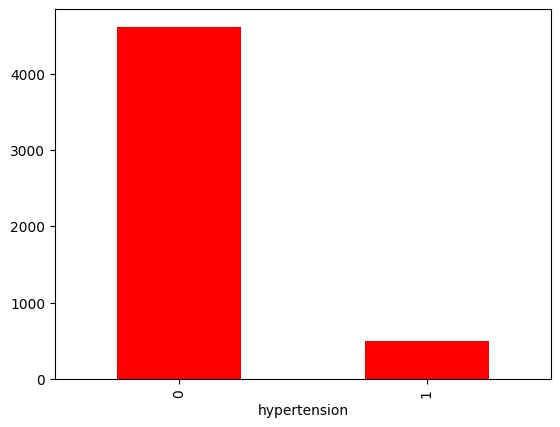

In [70]:
df['hypertension'].value_counts().plot(kind = "bar", color = "red")

# Work type analysis

In [71]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

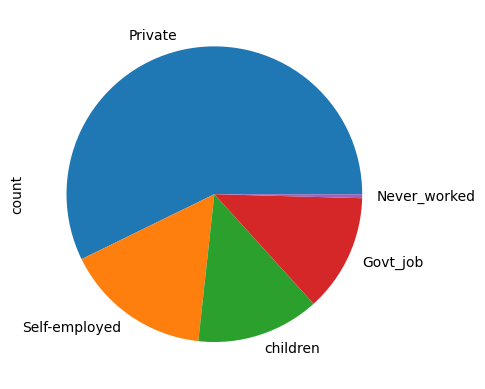

In [72]:
# graphical representation

df['work_type'].value_counts().plot(kind = "pie")

# Smoking status Analysis

In [73]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

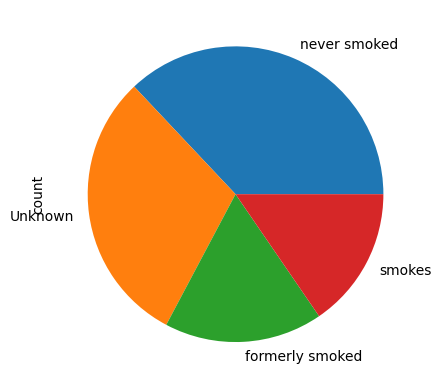

In [74]:
df["smoking_status"].value_counts().plot(kind = "pie")

# Residance type Analysis

In [75]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

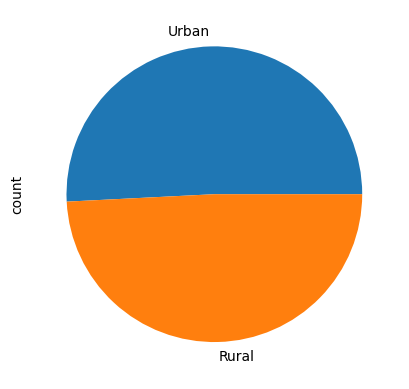

In [76]:
df["Residence_type"].value_counts().plot(kind = "pie")

We have equal percentage of population who are from urban and rural areas

# BMI Analysis

In [77]:
# Number of  BMI- NULL values

df["bmi"].isnull().sum()

201

we have null values in BMI column contains 201 NaN

<Axes: xlabel='bmi', ylabel='Count'>

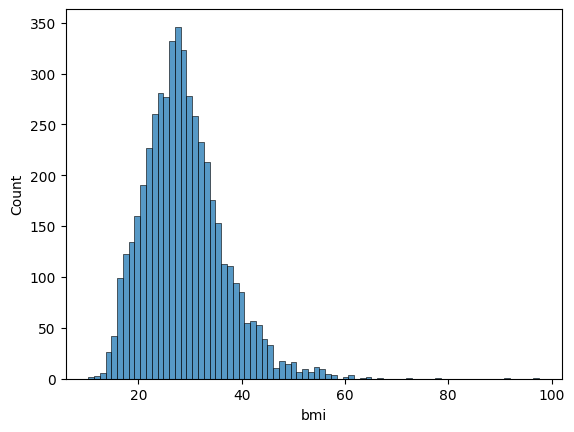

In [78]:
sns.histplot(data = df["bmi"])

BMI is highly skewed

<Axes: ylabel='bmi'>

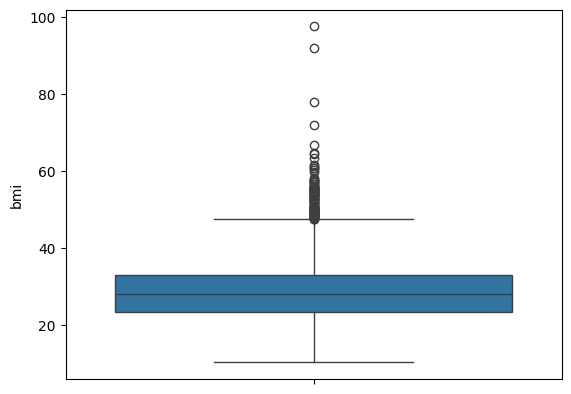

In [79]:
sns.boxplot(data = df["bmi"])

Based on histogram and distplot , there are outliers in BMI column

In [80]:
# finding the count of ouliers
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
# Finding IQR
IQR = q3 - q1
da = (df["bmi"] < (q1 - 1.5 * IQR)) | (df["bmi"] > (q3 + 1.5 * IQR))
da.value_counts()

bmi
False    5000
True      110
Name: count, dtype: int64

Total Outliers : 110

Total non-outliers : 5000

In [81]:
# percentage of null values in BMI
df["bmi"].isna().sum() / len(df["bmi"]) * 100

3.9334637964774952

NULL values hold 3.93% of the dataframe

In [82]:
df_na = df.loc[df["bmi"]. isnull()]
g = df_na["stroke"].sum()
print("People who got stroke and their BMI is NA :", g)
h = df["stroke"].sum()
print("people who got stroke and their BMI is given", h)
print("percentage of people with stroke in NAN values to the overall dataset : ", g / h * 100)

People who got stroke and their BMI is NA : 40
people who got stroke and their BMI is given 249
percentage of people with stroke in NAN values to the overall dataset :  16.06425702811245


In [83]:
# percentage of instance who got stroke

df["stroke"].sum() / len(df) * 100

4.87279843444227

our main  target is stroke and who got stroke in the minority 249 which is only 4.9%

In [84]:
# dealing with null values in BMI

print("Median of BMI : ", df["bmi"].median())

df["bmi"] = df["bmi"].fillna(df["bmi"].median())


Median of BMI :  28.1


<Axes: >

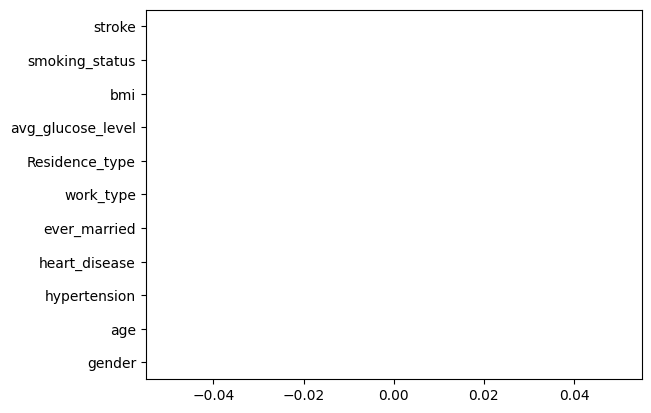

In [85]:
df.isna().sum().plot(kind = "barh")

# Age Analysis

<Axes: xlabel='age', ylabel='Count'>

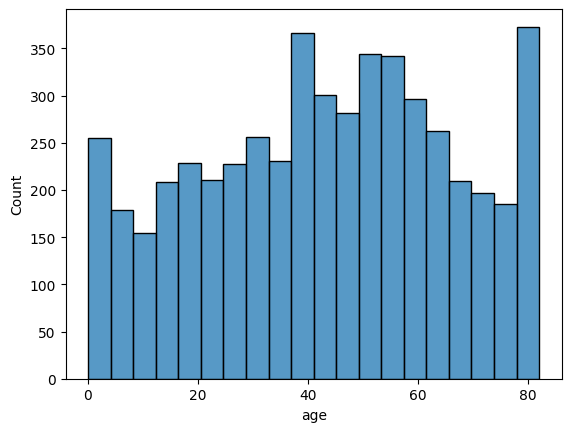

In [86]:
sns.histplot(data = df["age"])

<Axes: ylabel='age'>

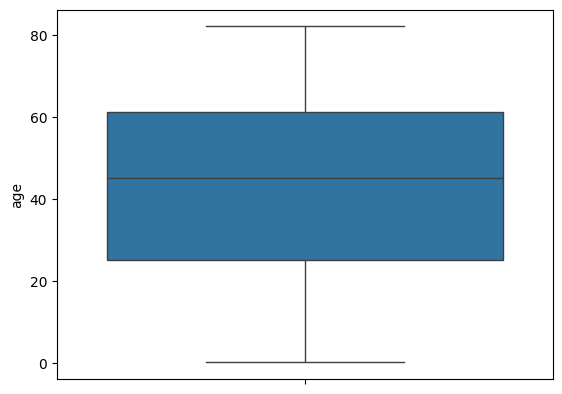

In [87]:
sns.boxplot(data = df["age"])

The age parameter value does not have outliers

# Average Glucose Level

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

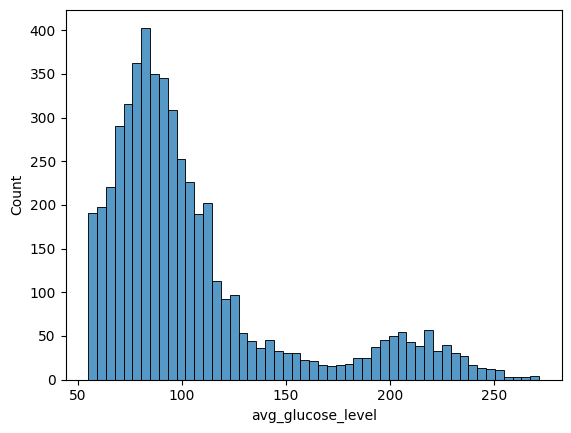

In [88]:
sns.histplot(data = df["avg_glucose_level"])

<Axes: ylabel='avg_glucose_level'>

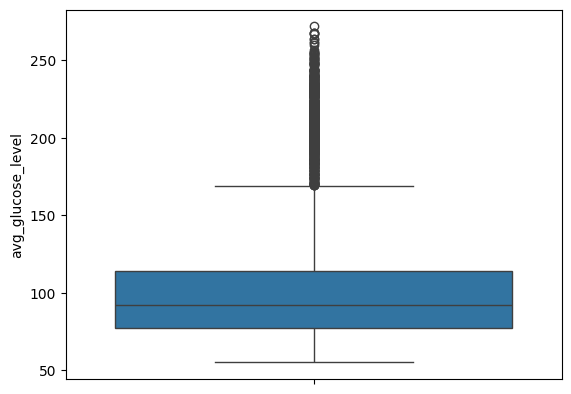

In [89]:
# boxplot
sns.boxplot(data = df["avg_glucose_level"])

In [90]:
# finding the count of outliers in avg_glucose_level

q1 = df["avg_glucose_level"].quantile(0.25)
q3 = df["avg_glucose_level"].quantile(0.75)
IQR = q3 - q1
da = (df["avg_glucose_level"] < (q1 - 1.5 * IQR)) | (df["avg_glucose_level"] > (q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

Total outliers in avg_glucose_level : 627

Total non-outliers in avg_glucose_level : 4483

# Heart diseases Analysis

In [91]:
df["heart_disease"].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: ylabel='count'>

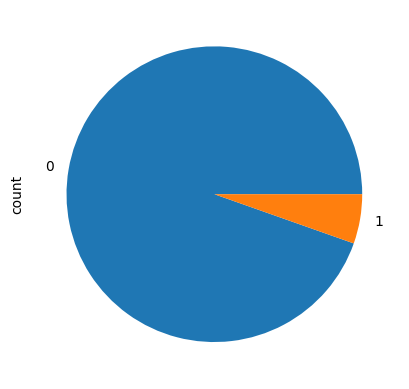

In [92]:
df["heart_disease"].value_counts().plot(kind = "pie")

# Ever married analysis with values

In [93]:
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [94]:
3353 / len(df)

0.6561643835616439

This result shows that 65.6% of people are married and 34.4 % are un-married of the population

<Axes: ylabel='count'>

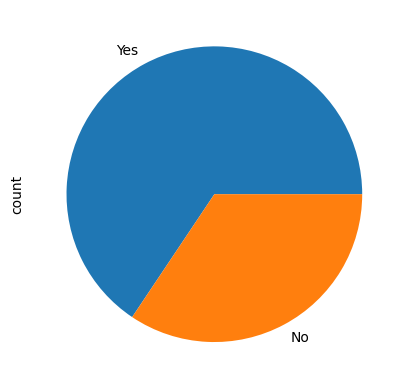

In [95]:
df["ever_married"].value_counts().plot(kind = "pie")

# Cross Analysis - All attributes compared with target variable

<Axes: xlabel='stroke', ylabel='count'>

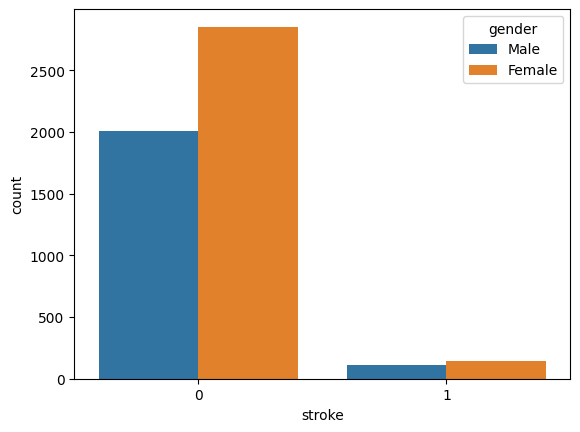

In [96]:
# comparing stroke with gender

sns.countplot(x = "stroke", hue = "gender", data = df)

# comparing stroke with work-type


<Axes: xlabel='stroke', ylabel='count'>

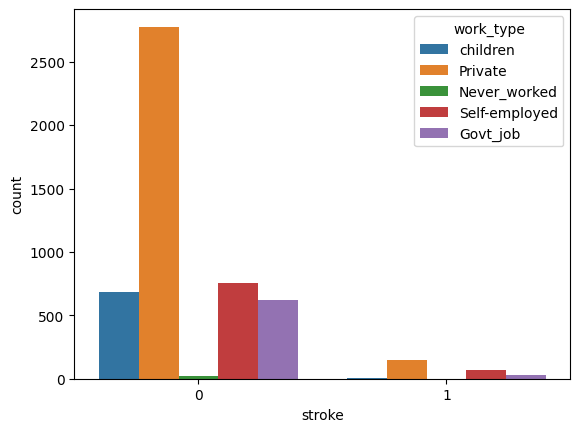

In [97]:
sns.countplot(x = "stroke", hue = "work_type", data = df)

People who never worked did not face heart attack  and the people who are privately employed got more heart attack

# comparing stroke with smoking status

<Axes: xlabel='stroke', ylabel='count'>

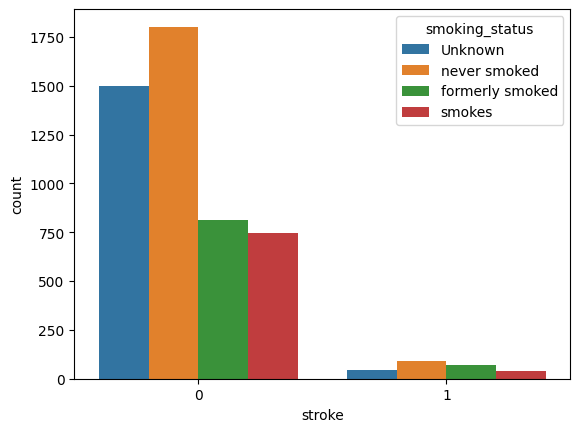

In [98]:
sns.countplot(x = "stroke", hue = "smoking_status" , data = df)

**people who formely smoked got more strokes. The people who smoked and never smoked has same probability of getting stroke**

# comparing stroke with residance type

<Axes: xlabel='stroke', ylabel='count'>

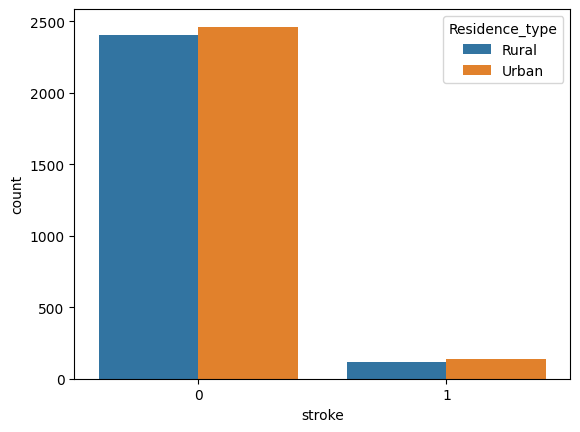

In [99]:
sns.countplot(x = "stroke", hue = "Residence_type", data = df)

**people who lived in urban areas are more like to getting stroke as compared rural areas**

# Comparing stroke with heart diseases

<Axes: xlabel='stroke', ylabel='count'>

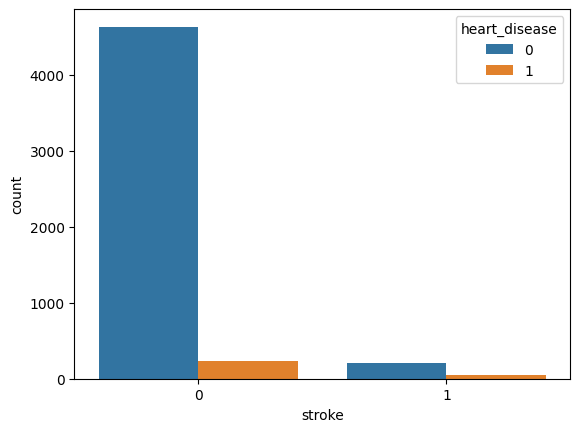

In [100]:
sns.countplot(x = "stroke", hue = "heart_disease", data = df)

**People with no heart diseases are suffering are suffering with stroke as compared to one who face heart problem**

# Comparing stroke with married status

<Axes: xlabel='stroke', ylabel='count'>

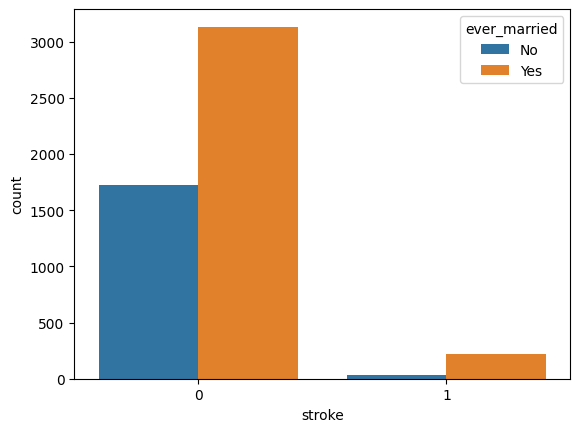

In [101]:
sns.countplot(x = "stroke", hue = "ever_married", data = df)

**Married people are more likely to get stroke as compared to un-married people**

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# creating dummy variable numeric binary attributes

In [103]:
# converting numerical binary values to string

df[["hypertension", "heart_disease", "stroke"]].astype(str)

# generate the dummy attributes

df = pd.get_dummies(df, drop_first = True)

<Axes: >

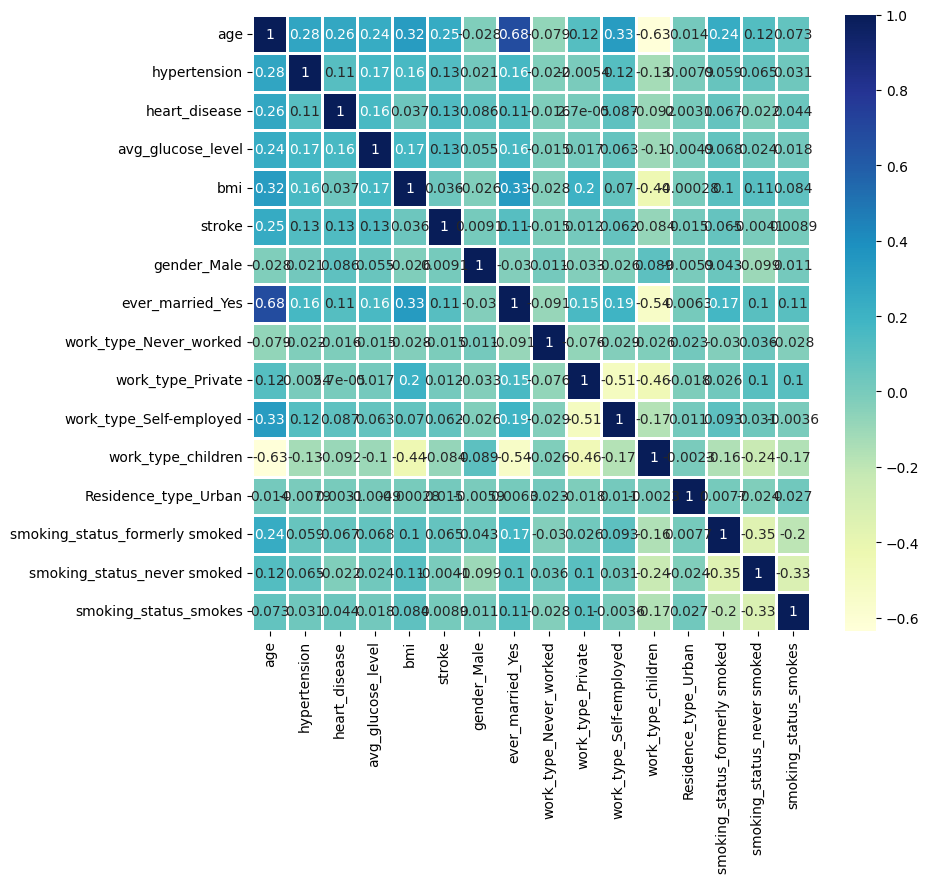

In [104]:
# correlation matrix

corrmat = df.corr()
f,ax = plt.subplots(figsize = (9,8))
sns.heatmap(corrmat, ax = ax ,cmap = "YlGnBu", linewidths = 0.8, annot = True)

In [105]:
# the dataframe after performing dummy attributes
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


In [107]:
pip install imblearn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------  256.0/258.0 kB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 3.9 MB/s eta 0:00:00


In [108]:
# use random over-sampling
from imblearn.over_sampling import RandomOverSampler

In [110]:
oversample = RandomOverSampler(sampling_strategy = "minority")

x = df.drop(['stroke'], axis = 1)

In [111]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.0,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.6,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,True,True,False,True,False,False,False,True,False,False


In [112]:
y = df["stroke"]


In [113]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [114]:
x_over, y_over = oversample.fit_resample(x,y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[["bmi", "avg_glucose_level", "age"]] = scaler.fit_transform(df[["bmi",
                                    "avg_glucose_level", "age"]])

In [115]:
# create a train test split
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x_over,y_over, test_size = 0.2, random_state = 42)

In [116]:
# checking the shape of split

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (7777, 15)
y_train :  (7777,)
x_test :  (1945, 15)
y_test :  (1945,)


# 1. Decision Tree Model*

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [118]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))

Accuracy :  97.53213367609254
ROC AUC Score :  0.9753846153846154


# 2. KNN Model

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]
print("Accuracy score : ", accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred) * 100)

Accuracy score :  97.53213367609254
ROC AUC Score :  97.53846153846155


# 3- XGBoost Model

In [121]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 5.3 MB/s eta 0:00:19
   ---------------------------------------- 0.6/99.8 MB 7.0 MB/s eta 0:00:15
   ---------------------------------------- 0.8/99.8 MB 6.6 MB/s eta 0:00:16
   ---------------------------------------- 1.1/99.8 MB 6.3 MB/s eta 0:00:16
   ---------------------------------------- 1.2/99.8 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.6/99.8 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.1/99.8 MB 6.1 MB/s eta 0:00:17
    --------------------------------------- 2.5/99.8 MB 6.6 MB/s eta 0:00:15
   - -------------------------------------- 4.2/99.8 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 4.2/99.8 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 4.2/99.8 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 4.2/99.8 MB 7.9 MB/s eta 0:00:13
   - 

In [122]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)
y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]

print("Accuarcy score : ", accuracy_score(y_test, y_pred))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))

Accuarcy score :  0.9753213367609255
ROC AUC Score :  0.9753846153846154


# 4- Plot ROC AUC

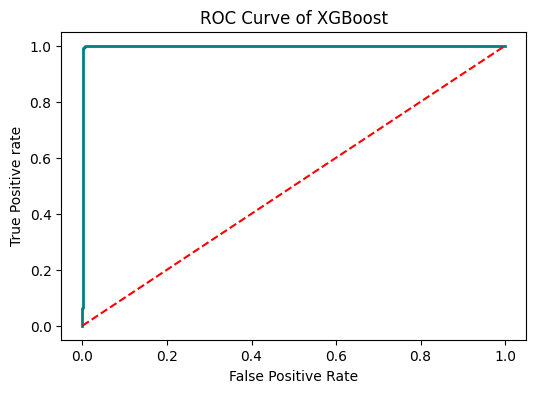

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth = 2, color = "teal")
plt.plot([0,1], [0,1], "r--")
plt.title("ROC Curve of XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.show()

# Confusion Matrix


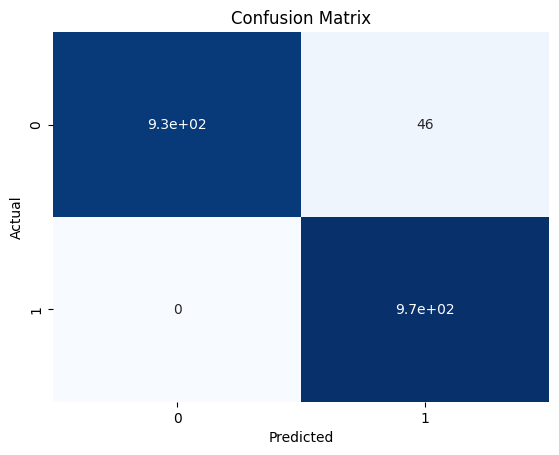

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, cmap = "Blues", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy Score : ", accuracy_score(y_test, y_pred_xgb))
print("precision score : ", precision_score(y_test, y_pred_xgb))
print("recall score : ", recall_score(y_test, y_pred_xgb))
print("f1 score : ", f1_score(y_test, y_pred_xgb))

Accuracy Score :  0.9763496143958869
precision score :  0.9547244094488189
recall score :  1.0
f1 score :  0.9768378650553876


# 5- Random Forest Classifier Model

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_rf) * 100)

Accuracy Score :  99.22879177377892


# 6- KFold Validation

In [127]:
from sklearn import model_selection

from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits = 20, shuffle = True)
results_kfold = model_selection.cross_val_score(rf_clf, x_over, y_over, cv = kfold)

print("Accuracy : ", results_kfold.mean() * 100)

Accuracy :  99.33152922486711


# 7- Logistic Regression Model

In [128]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter = 1000)

classifier.fit(x_train ,y_train)
y_pred_lr = classifier.predict(x_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred_lr)*100)

Accuracy score :  76.1439588688946


# 8- Prediction of Model

In [130]:
age = 75
avg_glucose_level = 300
bmi = 36.6
gender_male = 1
ever_married_Yes = 1
work_type_Never_worked = 0
work_type_Private = 1
work_type_Self_employed = 0
work_type_children = 0
Residence_type_Urban = 1
smoking_status_formerly_smoked = 1
smoking_status_never_smoked = 0
smoking_status_smokes = 0
hypertension = 0
heart_disease = 1


input_feature = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']

feature_values = {
    'age': age,
    'hypertension': hypertension,
    'heart_disease': heart_disease,
    'avg_glucose_level': avg_glucose_level,
    'bmi': bmi,
    'gender_Male': gender_male,
    'ever_married_Yes': ever_married_Yes,
    'work_type_Never_worked': work_type_Never_worked,
    'work_type_Private': work_type_Private,
    'work_type_Self-employed': work_type_Self_employed,
    'work_type_children': work_type_children,
    'Residence_type_Urban': Residence_type_Urban,
    'smoking_status_formerly smoked': smoking_status_formerly_smoked,
    'smoking_status_never smoked': smoking_status_never_smoked,
    'smoking_status_smokes': smoking_status_smokes
}

df = pd.DataFrame(feature_values, index=[0])

prediction = rf_clf.predict(df)

# Check the prediction
if prediction[0] == 0:
    print('The person will not get a stroke')
else:
    print('The person can get a stroke')

The person can get a stroke


In [131]:
import pickle

In [132]:
filename = 'stroke_model.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

In [133]:
loaded_model = pickle.load(open('stroke_model.sav', 'rb'))

In [134]:
for column in df.columns:
  print(column)

age
hypertension
heart_disease
avg_glucose_level
bmi
gender_Male
ever_married_Yes
work_type_Never_worked
work_type_Private
work_type_Self-employed
work_type_children
Residence_type_Urban
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes
